In [1]:
%matplotlib inline

from control import *
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'control'

In [ ]:
l = 1
k = 2
m = 1
g = 9.81

In [2]:
num = [g/l]
den = [1, k/m, g/l]

NameError: name 'g' is not defined

In [6]:
kran = tf(num, den)
print(kran)
print(pole(kran))


      9.81
----------------
s^2 + 2 s + 9.81

[-1.+2.96816442j -1.-2.96816442j]


In [7]:
ret = impulse_response(kran)
plt.plot(ret[0], ret[1], 'b-')
plt.grid(True)
plt.gcf().set_size_inches(18.5, 9.5, forward=True)

AttributeError: 'TransferFunctionContinuous' object has no attribute 'A'

In [ ]:
ret = step_response(kran)
plt.plot(ret[0], ret[1], 'b-')
plt.grid(True)
plt.gcf().set_size_inches(18.5, 9.5, forward=True)

/usr/local/lib/python3.5/dist-packages/control/freqplot.py:153: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/usr/local/lib/python3.5/dist-packages/control/freqplot.py:163: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);


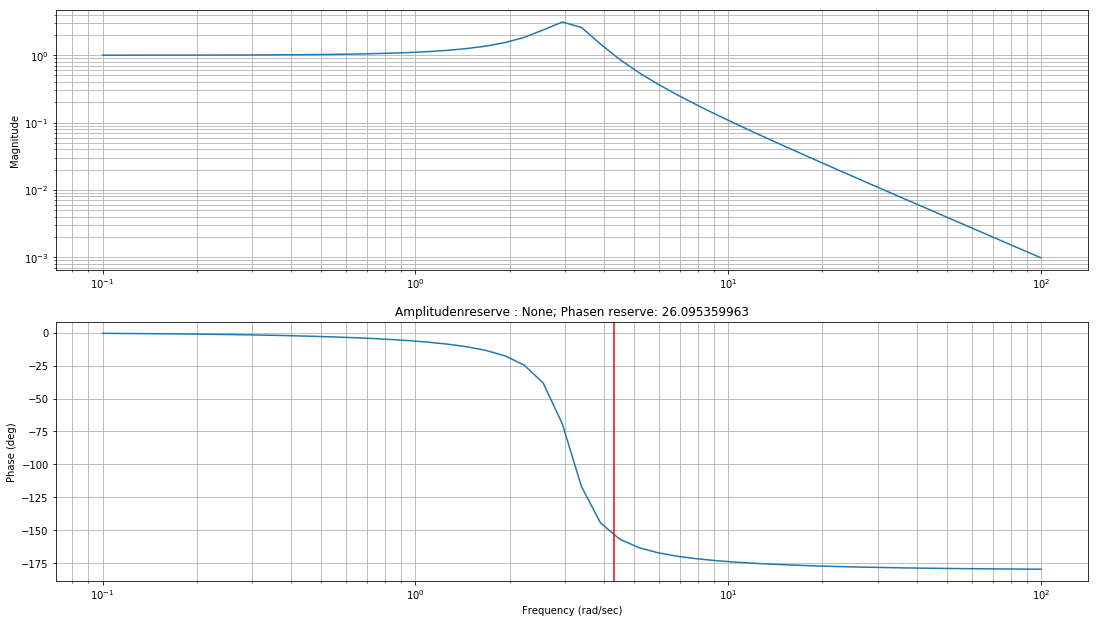

In [27]:
margins = stability_margins(kran)
bode(kran)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.axvline(margins[4]).set_color('red')
ret = plt.title('Amplitudenreserve : ' + str(margins[0]) + '; Phasen reserve: ' + str(margins[1]))

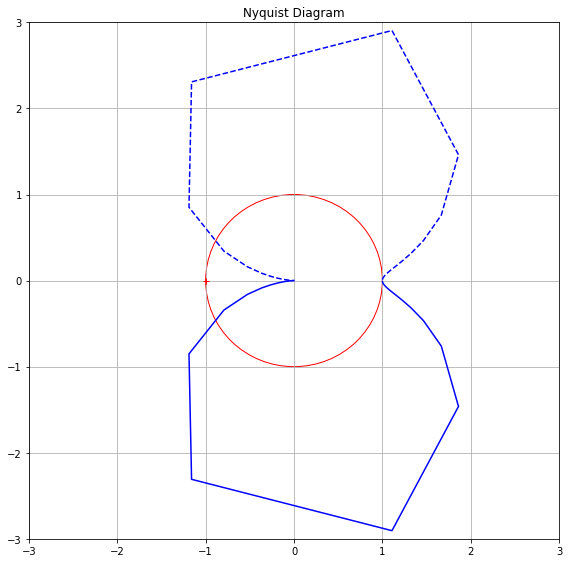

In [9]:
nyquist(kran)
plt.grid(True)
plt.title('Nyquist Diagram')
plt.gcf().set_size_inches(9.5, 9.5, forward=True)
plt.gca().add_artist(plt.Circle((0,0),1,facecolor='none',edgecolor='r'))
plt.gca().set_xlim([-3,3])
ret = plt.gca().set_ylim([-3,3])

In [28]:
# P-Regler - Stationäre Ungenauigkeit
# Prameter berechnet nach 0.98 stätionäre Genauigkeit (Folie 31)
# Gg = Kp*(g/l) / s^2 + (k/m)*s + (Kp+1)(g/l) --> 0.98 (Step)

Kp = 200

regler = tf([Kp], [1])
print('Regler: ' + str(regler))
print('Kran: ' + str(kran))

G0 = series(regler, kran)
print('G0: ' + str(G0))
print('Pole G0: ' + str(pole(G0)))
Gg = feedback(G0)
print('Gg: ' + str(Gg))
print('Pole Gg: ' + str(pole(Gg)))

Regler: 
200
---
 1

Kran: 
     9.81
--------------
s^2 + s + 9.81

G0: 
     1962
--------------
s^2 + s + 9.81

Pole G0: [-0.5+3.09192497j -0.5-3.09192497j]
Gg: 
     1962
--------------
s^2 + s + 1972

Pole Gg: [-0.5+44.4022522j -0.5-44.4022522j]


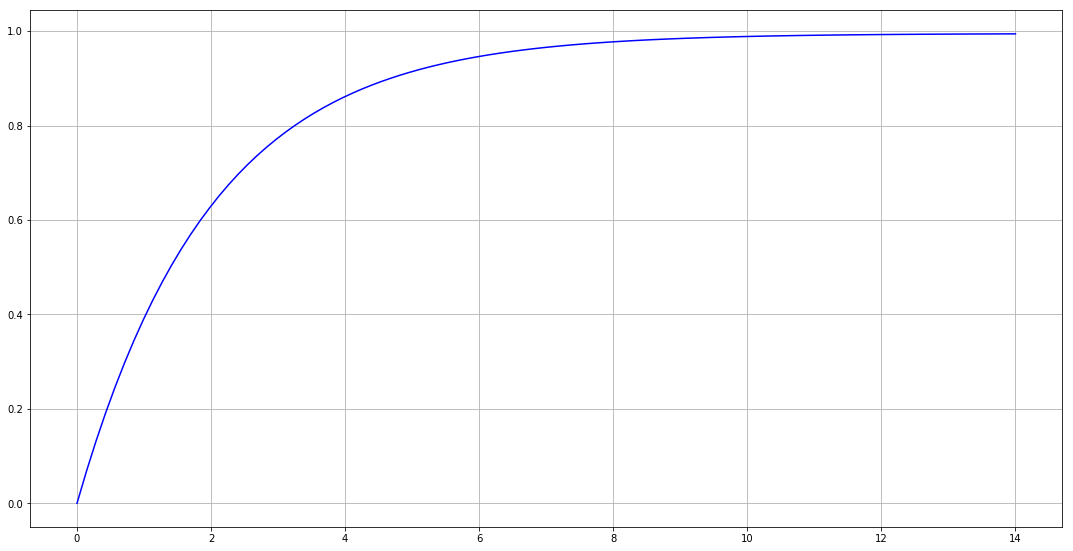

In [29]:
ret = step_response(Gg)
plt.plot(ret[0], ret[1], 'b-')
plt.grid(True)
plt.gcf().set_size_inches(18.5, 9.5, forward=True)

/usr/local/lib/python3.5/dist-packages/control/freqplot.py:153: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/usr/local/lib/python3.5/dist-packages/control/freqplot.py:163: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);


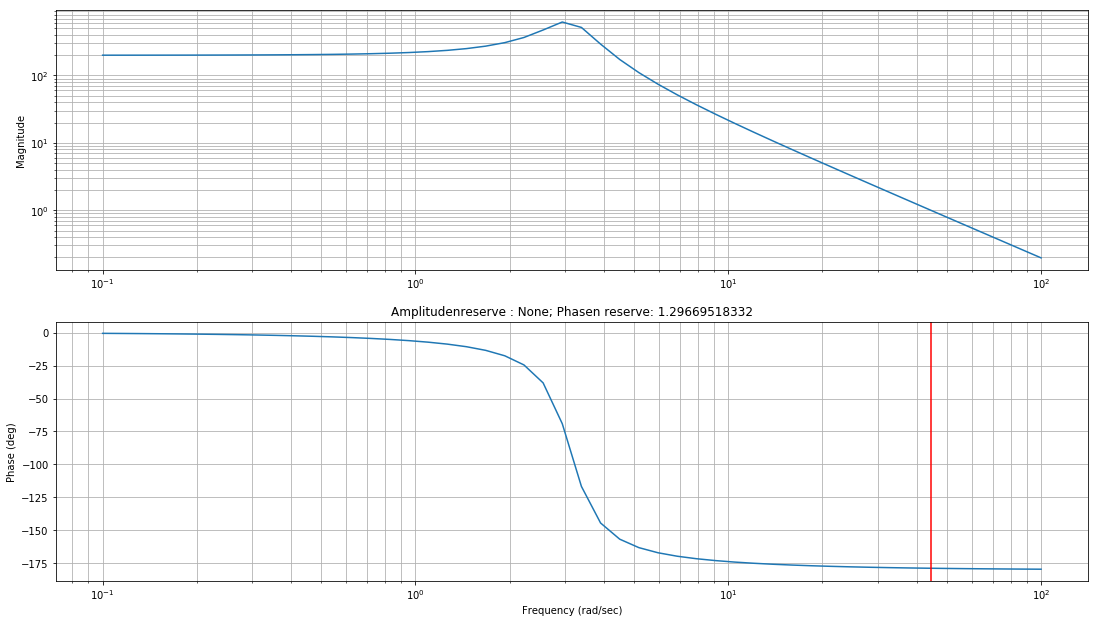

In [30]:
margins = stability_margins(G0)
bode(G0)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.axvline(margins[4]).set_color('red')
ret = plt.title('Amplitudenreserve : ' + str(margins[0]) + '; Phasen reserve: ' + str(margins[1]))

In [31]:
# PI-Regler - Stationäre Genauigkeit

Kp = 0.2
Tn = 1

regler = tf([Kp*Tn, Kp], [Tn, 0])
print('Regler: ' + str(regler))
print('Kran: ' + str(kran))

G0 = series(regler, kran)
print('G0: ' + str(G0))
print('Pole G0: ' + str(pole(G0)))
Gg = feedback(G0)
print('Gg: ' + str(Gg))
print('Pole Gg: ' + str(pole(Gg)))

Regler: 
0.2 s + 0.2
-----------
     s

Kran: 
     9.81
--------------
s^2 + s + 9.81

G0: 
  1.962 s + 1.962
------------------
s^3 + s^2 + 9.81 s

Pole G0: [-0.5+3.09192497j -0.5-3.09192497j  0.0+0.j        ]
Gg: 
      1.962 s + 1.962
---------------------------
s^3 + s^2 + 11.77 s + 1.962

Pole Gg: [-0.41566206+3.38511458j -0.41566206-3.38511458j -0.16867588+0.j        ]


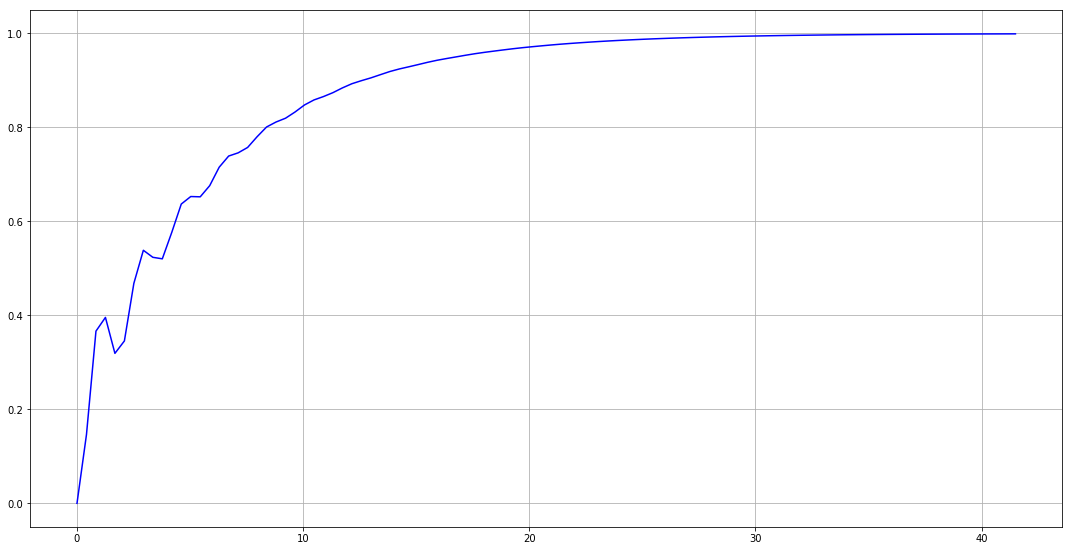

In [32]:
ret = step_response(Gg)
plt.plot(ret[0], ret[1], 'b-')
plt.grid(True)
plt.gcf().set_size_inches(18.5, 9.5, forward=True)

/usr/local/lib/python3.5/dist-packages/control/freqplot.py:153: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/usr/local/lib/python3.5/dist-packages/control/freqplot.py:163: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);


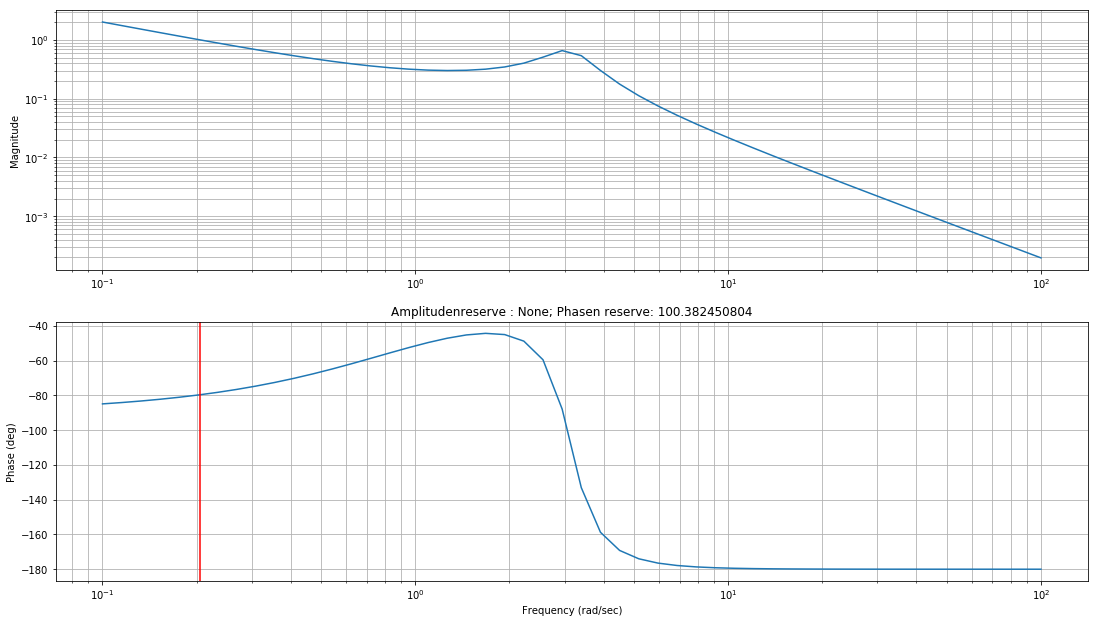

In [33]:
margins = stability_margins(G0)
bode(G0)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.axvline(margins[4]).set_color('red')
ret = plt.title('Amplitudenreserve : ' + str(margins[0]) + '; Phasen reserve: ' + str(margins[1]))

In [34]:
# PID-Regler - Kompensation der Schwingung (Wahrscheinlich nicht realisierbar)
KTT = 1
KT = k/m
Kp = g/l

Tn = KT/Kp
Tv = KTT/(Kp*Tn)

nom = [Kp*Tv*Tn, Kp*Tn, Kp*1]
den = [Tn, 0]
regler = tf(nom, den)
print('Regler: ' + str(regler))
print('Kran: ' + str(kran))
G0 = series(regler, kran)
print('G0: ' + str(G0))
print('Pole G0: ' + str(pole(G0)))
Gg = feedback(G0)
print('Gg: ' + str(Gg))
print('Pole Gg: ' + str(pole(Gg)))

Regler: 
s^2 + s + 9.81
--------------
   0.1019 s

Kran: 
     9.81
--------------
s^2 + s + 9.81

G0: 
 9.81 s^2 + 9.81 s + 96.24
---------------------------
0.1019 s^3 + 0.1019 s^2 + s

Pole G0: [-0.5+3.09192497j -0.5-3.09192497j  0.0+0.j        ]
Gg: 
        9.81 s^2 + 9.81 s + 96.24
----------------------------------------
0.1019 s^3 + 9.912 s^2 + 10.81 s + 96.24

Pole Gg: [-96.2361+0.j          -0.5000+3.09192497j  -0.5000-3.09192497j]


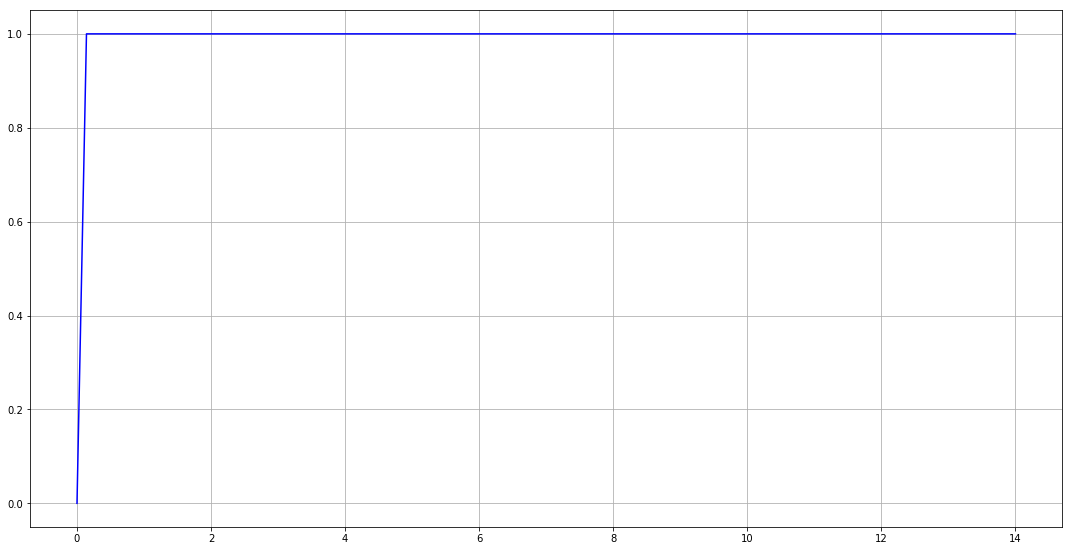

In [35]:
ret = step_response(Gg)
plt.plot(ret[0], ret[1], 'b-')
plt.grid(True)
plt.gcf().set_size_inches(18.5, 9.5, forward=True)

/usr/local/lib/python3.5/dist-packages/control/freqplot.py:153: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/usr/local/lib/python3.5/dist-packages/control/freqplot.py:163: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);


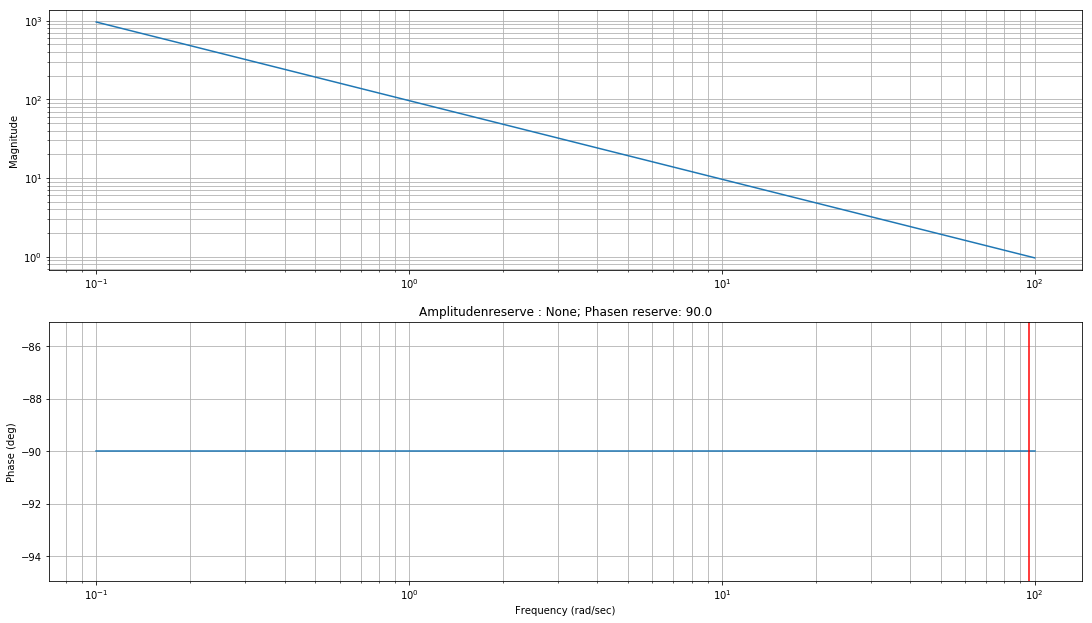

In [36]:
margins = stability_margins(G0)
bode(G0)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.axvline(margins[4]).set_color('red')
ret = plt.title('Amplitudenreserve : ' + str(margins[0]) + '; Phasen reserve: ' + str(margins[1]))

G0: 
  9.81
--------
0.1019 s

Pole G0: [ 0.]
Gg: 
      9.81
---------------
0.1019 s + 9.81

Pole Gg: [-96.27085378]


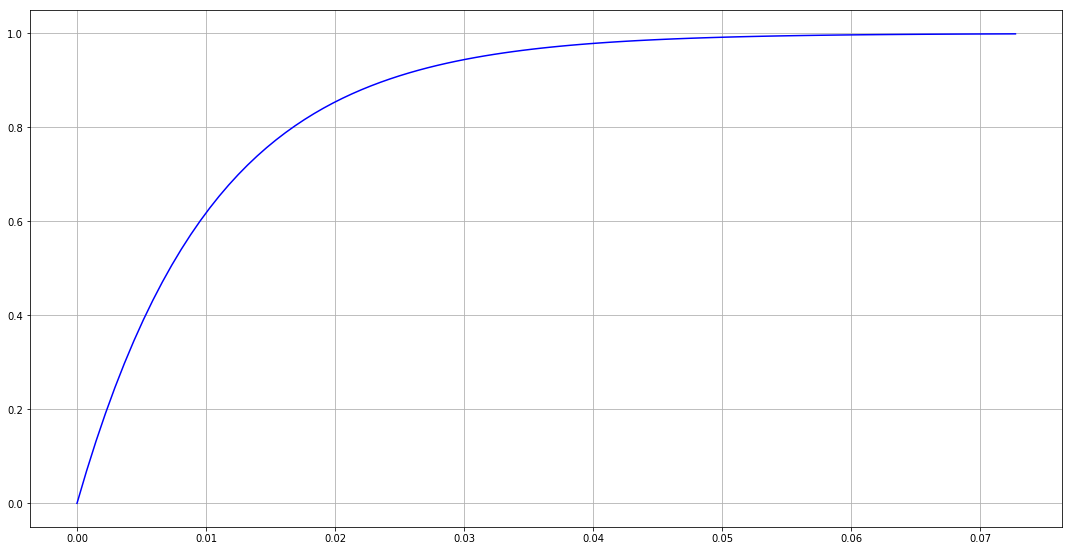

In [37]:
# PI - Regler
G0 = tf([9.81], [0.1019, 0])
print('G0: ' + str(G0))
print('Pole G0: ' + str(pole(G0)))
Gg = feedback(G0)
print('Gg: ' + str(Gg))
print('Pole Gg: ' + str(pole(Gg)))

ret = step_response(Gg)
plt.plot(ret[0], ret[1], 'b-')
plt.grid(True)
plt.gcf().set_size_inches(18.5, 9.5, forward=True)

/usr/local/lib/python3.5/dist-packages/control/freqplot.py:153: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/usr/local/lib/python3.5/dist-packages/control/freqplot.py:163: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(True);


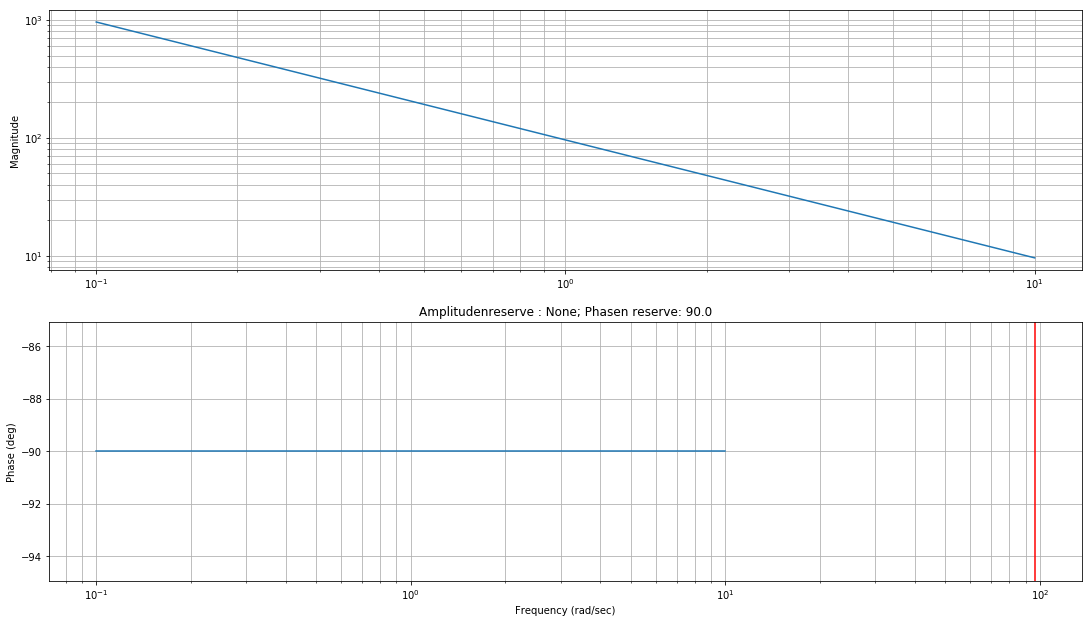

In [23]:
margins = stability_margins(G0)
bode(G0)
plt.gcf().set_size_inches(18.5, 10.5, forward=True)
plt.axvline(margins[4]).set_color('red')
ret = plt.title('Amplitudenreserve : ' + str(margins[0]) + '; Phasen reserve: ' + str(margins[1]))